In [1]:
import numpy as np
import numpy.random as R
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
import matplotlib.pyplot as plot

# limit threads for interactive environment
import tensorflow as tf
tf.config.threading.set_intra_op_parallelism_threads(4)
tf.config.threading.set_inter_op_parallelism_threads(4)

In [2]:
def load_real_samples():
    (x_train, _), (_, _) = load_data()
    X = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    X = X.astype('float32')
    X = X / 255.0
    return X

In [9]:
load_real_samples()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
dataset = load_real_samples()
print(dataset.shape)

(60000, 784)


In [19]:
def save_plot(examples, n=10):  
    plot.figure(figsize=(10,10))
    for i in range(n * n):      
        plot.subplot(n, n, 1 + i)      
        plot.axis('off')      
        plot.imshow(examples[i].reshape(28,28), cmap='gray_r')  
#     filename = 'contents/generated_plot.png'  
    plot.savefig(filename)
    plot.close()

(100, 784)


NameError: name 'filename' is not defined

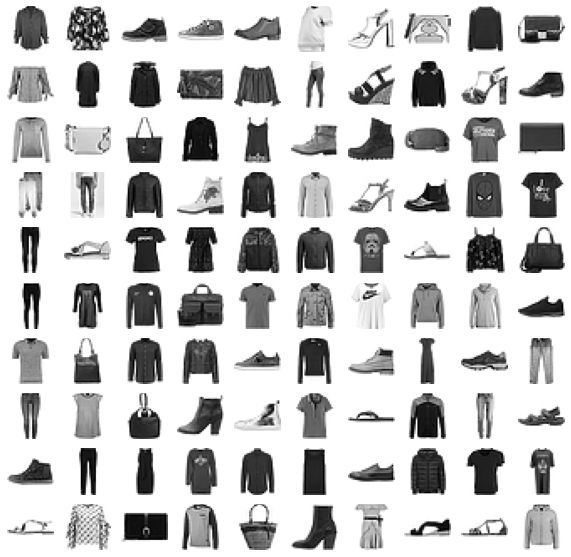

In [20]:
def generate_real_samples(dataset, n_samples):
    ix = R.randint(0, dataset.shape[0], n_samples)    
    X = dataset[ix]    
    y = np.ones((n_samples, 1))
    return X, y

real = generate_real_samples(dataset, 100)
print(real[0].shape)
save_plot(real[0])

# Build the generator

In [21]:
latent_dim = 100

def build_generator(latent_dim):
    model = Sequential()    
    n_nodes = 256
    model.add(Dense(n_nodes, input_dim=latent_dim))    
    model.add(Dense(784,activation='sigmoid'))
    return model

generator = build_generator(latent_dim)
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 dense_1 (Dense)             (None, 784)               201488    
                                                                 
Total params: 227,344
Trainable params: 227,344
Non-trainable params: 0
_________________________________________________________________


# Helper Functions

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(100, 784)


NameError: name 'filename' is not defined

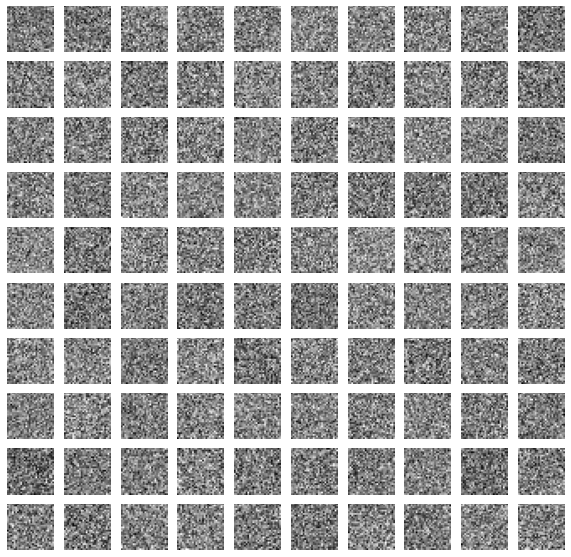

In [29]:
def generate_latent_vector(latent_dim, n_samples):    
    x_input = R.randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def generate_fake_samples(g_model, latent_dim, n_samples):    
    x_input = generate_latent_vector(latent_dim, n_samples)    
    X = g_model.predict(x_input)
    y = np.zeros((n_samples, 1))
    return X, y

fake = generate_fake_samples(generator, latent_dim, 100)
print(fake[0].shape)
save_plot(fake[0])

# Build the discriminator

In [22]:
def build_discriminator():
    model = Sequential()
    model.add(Dense(256, input_dim=784))
    model.add(LeakyReLU(alpha=0.2))    
    model.add(Dense(1, activation='sigmoid'))    
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 201,217
Trainable params: 201,217
Non-trainable params: 0
_________________________________________________________________


/Users/parzival2108/opt/anaconda3/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Combined GAN Model

In [23]:
def build_gan(g_model, d_model):    
    d_model.trainable = False
    model = Sequential()
    model.add(g_model)
    model.add(d_model)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

gan = build_gan(generator, discriminator)
gan.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 784)               227344    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 201217    
                                                                 
Total params: 428,561
Trainable params: 227,344
Non-trainable params: 201,217
_________________________________________________________________


# Training the GAN

In [27]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):    
    X_real, y_real = generate_real_samples(dataset, n_samples)    
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)    
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)    
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)    
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))    
    save_plot(x_fake)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

NameError: name 'filename' is not defined

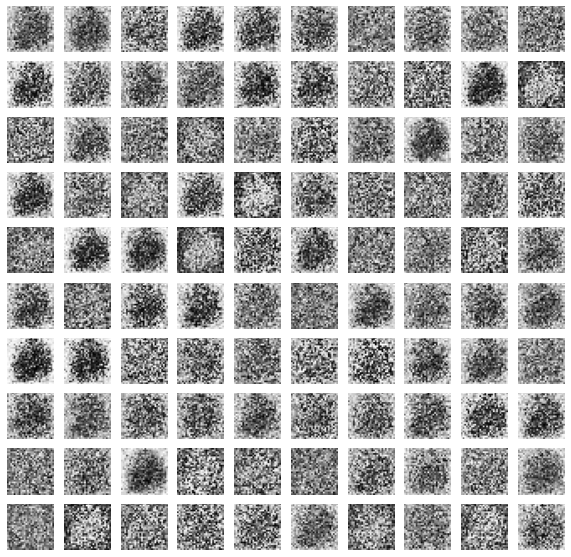

In [30]:
batch_size = 256
epochs = 10
bat_per_epo = int(dataset.shape[0] / batch_size)
half_batch = int(batch_size / 2)

for i in range(epochs):  
    for j in range(bat_per_epo):    
        X_real, y_real = generate_real_samples(dataset, half_batch)    
        X_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)    
        X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))    
        d_loss, _ = discriminator.train_on_batch(X, y)    
        X_gan = generate_latent_vector(latent_dim, batch_size)    
        y_gan = np.ones((batch_size, 1))    
        g_loss = gan.train_on_batch(X_gan, y_gan)    
    summarize_performance(i, generator, discriminator, dataset, 100)